
# The Maximum Cut or Max-Cut problem

• Consider the problem of dividing the vertices of a graph
into two sets such that the number of edges with extremes
in both sets is the maximum possible

• It can be proved that this problem, called “maximum cut” or
“Max-Cut”, is NP-hard

• It is also APX-Hard and thus there is no (classical)
polynomial-time approximation scheme (PTAS) which gets
arbitrarily close to the solution (unless P = NP)


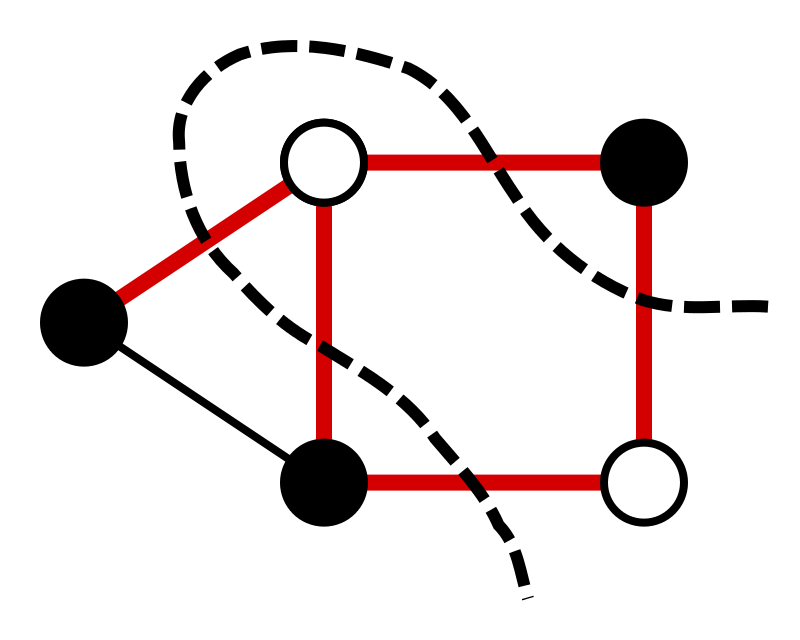

In [ ]:
!pip install dimod
import numpy as np
import dimod

# State the problem that we want to solve is very easy
# We will start with a simple case

J = {(0,1):1}

h = {}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)

print("The model that we are going to solve is")
print(model)
print()

# We can solve it exactly

from dimod.reference.samplers import ExactSolver
sampler = ExactSolver()
solution = sampler.sample(model)
print("The exact solution is")
print(solution)
print()




In [17]:
# And, of course, with D-Wave's quantum computer 

!pip install dwave-system
!pip install dwave-system[drivers] 
from dwave.drivers import __license__
print(__license__)

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
sampler_name = sampler.properties['child_properties']['chip_id']
response = sampler.sample(model, num_reads=5000)
print("The solution obtained by D-Wave's quantum annealer",sampler_name,"is")
print(response)
print()

print()
print()
print()


You are using pip version 9.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement dwave-drivers<0.5.0,>=0.4.0; extra == "drivers" (from dwave-system[drivers]) (from versions: )
No matching distribution found for dwave-drivers<0.5.0,>=0.4.0; extra == "drivers" (from dwave-system[drivers])
You are using pip version 9.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'dwave.drivers'

In [18]:
# Let us now see a more complicated case 

J = {(0,1):1,(0,2):1,(1,2):1,(1,3):1,(2,4):1,(3,4):1}
h = {}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
print("The model that we are going to solve is")
print(model)
print()

The model that we are going to solve is
BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}, {(0, 1): 1, (0, 2): 1, (1, 2): 1, (1, 3): 1, (2, 4): 1, (3, 4): 1}, 0.0, 'SPIN')



In [19]:
# First, we solve it exactly

sampler = ExactSolver()
solution = sampler.sample(model)
print("The exact solution is")
print(solution)
print()

The exact solution is
    0  1  2  3  4 energy num_oc.
8  -1 -1 +1 +1 -1   -4.0       1
9  +1 -1 +1 +1 -1   -4.0       1
28 -1 +1 -1 -1 +1   -4.0       1
29 +1 +1 -1 -1 +1   -4.0       1
4  -1 +1 +1 -1 -1   -2.0       1
11 -1 +1 +1 +1 -1   -2.0       1
14 +1 -1 -1 +1 -1   -2.0       1
17 +1 -1 -1 +1 +1   -2.0       1
27 -1 +1 +1 -1 +1   -2.0       1
30 +1 -1 -1 -1 +1   -2.0       1
2  +1 +1 -1 -1 -1    0.0       1
3  -1 +1 -1 -1 -1    0.0       1
6  +1 -1 +1 -1 -1    0.0       1
7  -1 -1 +1 -1 -1    0.0       1
12 -1 +1 -1 +1 -1    0.0       1
13 +1 +1 -1 +1 -1    0.0       1
18 +1 +1 -1 +1 +1    0.0       1
19 -1 +1 -1 +1 +1    0.0       1
22 +1 -1 +1 +1 +1    0.0       1
23 -1 -1 +1 +1 +1    0.0       1
24 -1 -1 +1 -1 +1    0.0       1
25 +1 -1 +1 -1 +1    0.0       1
1  +1 -1 -1 -1 -1    2.0       1
5  +1 +1 +1 -1 -1    2.0       1
10 +1 +1 +1 +1 -1    2.0       1
15 -1 -1 -1 +1 -1    2.0       1
16 -1 -1 -1 +1 +1    2.0       1
20 -1 +1 +1 +1 +1    2.0       1
26 +1 +1 +1 -1 +1    

In [20]:
# Now, with *simulated annealing*

sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)
print("The solution with simulated annealing is")
print(response)
print()


The solution with simulated annealing is
   0  1  2  3  4 energy num_oc.
0 -1 -1 +1 +1 -1   -4.0       1
1 -1 +1 -1 -1 +1   -4.0       1
2 +1 -1 +1 +1 -1   -4.0       1
3 -1 -1 +1 +1 -1   -4.0       1
4 +1 -1 +1 +1 -1   -4.0       1
5 +1 +1 -1 -1 +1   -4.0       1
6 -1 -1 +1 +1 -1   -4.0       1
7 +1 -1 +1 +1 -1   -4.0       1
8 +1 +1 -1 -1 +1   -4.0       1
9 -1 -1 +1 +1 -1   -4.0       1
['SPIN', 10 rows, 10 samples, 5 variables]



In [21]:
# Finally, we use the *quantum annealer* again

sampler = EmbeddingComposite(DWaveSampler(solver='Advantage_system1.1'))
sampler_name = sampler.properties['child_properties']['chip_id']
response = sampler.sample(model, num_reads=5000)
print("The solution obtained by D-Wave's quantum annealer",sampler_name,"is")
print(response)
print()


NameError: name 'EmbeddingComposite' is not defined